### 3. Model Preparation and Training

In [56]:
# Import packages

import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import pickle

In [57]:
# Read datasets with pickle

with open(r'C:\Users\pc\Desktop\datasets\X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)  
    
with open(r'C:\Users\pc\Desktop\datasets\y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)    
    
with open(r'C:\Users\pc\Desktop\datasets\X_val.pkl', 'rb') as f:
    X_val = pickle.load(f)    
    
with open(r'C:\Users\pc\Desktop\datasets\y_val.pkl', 'rb') as f:
    y_val = pickle.load(f)    
    
with open(r'C:\Users\pc\Desktop\datasets\X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)    
    
with open(r'C:\Users\pc\Desktop\datasets\y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)    

In [58]:
# The number of samples

print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")
print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")
print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 6980
y_train: 6980
X_val: 876
y_val: 876
X_test: 876
y_test: 876


##### 3.1 CNN Model 

In [59]:
# Creating a model object

model = tf.keras.Sequential()

In [123]:
X_train[0].shape

(64, 64)

In [110]:
# Convolution and max pooling layers

# First conv block 
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu", # Activation Func = ReLU
                                 input_shape=(64,64,1))) 

model.add(tf.keras.layers.MaxPooling2D((2,2))) # Pooling

# Second conv block
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Third conv block
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Last conv block
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

In [111]:
# Flatten layer

model.add(tf.keras.layers.Flatten())

In [112]:
# Classification Layers
# nodes choiced 128, dropout: 0.7, activation function = ReLU

# Dense and Dropout Layer
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.7))

# Dense and Dropout Layer
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.7))

In [113]:
# Output Layer

# We have 10 classification 
# and because of output layer our activation func. is softmax

model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [114]:
# Optimizer

# we use sparse_categorical_crossentropy as there are multiple categories

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

##### 3.2 Training the model

In [115]:
# Train the model for 20 epochs with batch size of 64

results = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=20,
                    validation_data=(X_val, y_val))

Epoch 1/20
110/110 [==============================] - 62s 556ms/step - loss: 2.1814 - accuracy: 0.1731 - val_loss: 1.9055 - val_accuracy: 0.2911
Epoch 2/20
110/110 [==============================] - 59s 537ms/step - loss: 1.9232 - accuracy: 0.2789 - val_loss: 1.7154 - val_accuracy: 0.3333
Epoch 3/20
110/110 [==============================] - 54s 492ms/step - loss: 1.7109 - accuracy: 0.3662 - val_loss: 1.3787 - val_accuracy: 0.5628
Epoch 4/20
110/110 [==============================] - 54s 492ms/step - loss: 1.4958 - accuracy: 0.4613 - val_loss: 1.1502 - val_accuracy: 0.5993
Epoch 5/20
110/110 [==============================] - 55s 498ms/step - loss: 1.3310 - accuracy: 0.5173 - val_loss: 0.9829 - val_accuracy: 0.6929
Epoch 6/20
110/110 [==============================] - 55s 496ms/step - loss: 1.2126 - accuracy: 0.5802 - val_loss: 0.9078 - val_accuracy: 0.7021
Epoch 7/20
110/110 [==============================] - 56s 505ms/step - loss: 1.0833 - accuracy: 0.6287 - val_loss: 0.7712 - val_ac

##### 3.3 Visualize the results 

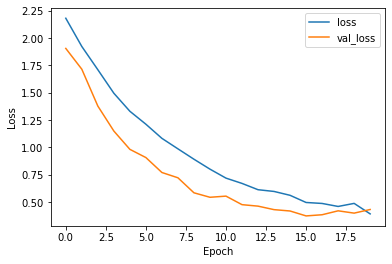

In [116]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

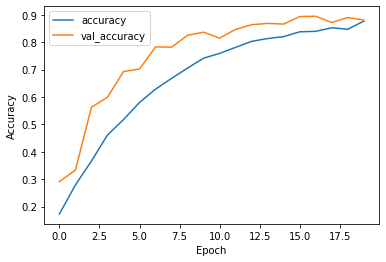

In [117]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [118]:
# Performance evaluation

model.evaluate(X_test, y_test)

28/28 [==============================] - 2s 54ms/step - loss: 0.4307 - accuracy: 0.8687


[0.43070679903030396, 0.8687214851379395]

In [75]:
# Prediction

prediction_result = model.predict(X_test[433].reshape(1,64,64,1))

print(prediction_result)

1/1 [==============================] - 0s 165ms/step
[[7.2671552e-16 4.8644020e-17 9.9999750e-01 2.5584920e-06 2.3319288e-16
  1.2861884e-12 2.9813065e-17 8.1185395e-18 2.0462436e-13 4.4421838e-10]]


In [76]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [77]:
# Print the results
print(f"Predicted class: {predicted_class}")
print(f"Predicted probability: {predicted_probability}")

Predicted class: 2
Predicted probability: 0.9999974966049194


### 3.4 Hyperparameter Optimization

After a large number of training, the three best models are presented. <br>
<br>
<strong> [loss,accuracy] </strong> <br>
<br>
Model 1:<br>
[0.43070679903030396, 0.8687214851379395] <br>
<br>
Model 2:<br>
[0.3628617525100708, 0.8926940560340881] <br>
<br>
Model 3:<br>
[0.43551167845726013, 0.8801369667053223] <br>

##### 3.4.1 Model 2

In [22]:
# Convolution and max pooling layers
# kernel_size selected (4,4)

# First conv block 
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(4,4),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu", # Activation Func = ReLU
                                 input_shape=(64,64,1))) 

model.add(tf.keras.layers.MaxPooling2D((2,2))) # Pooling

# Second conv block 
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(4,4),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Third conv block 
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(4,4),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Last conv block
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(4,4),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

In [23]:
# Flatten layer

model.add(tf.keras.layers.Flatten())

In [24]:
# Classification Layers
# nodes choiced 128, dropout: 0.7, activation function = ReLU

# Dense and Dropout Layer
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.7))

# Dense and Dropout Layer
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.7))

In [25]:
# Output Layer

# We have 10 classification 
# and because of output layer our activation func. is softmax

model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [26]:
# Optimizer

# we use sparse_categorical_crossentropy as there are multiple categories

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
# Train the model for 20 epochs with batch size of 64

results = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=20,
                    validation_data=(X_val, y_val))

Epoch 1/20
110/110 [==============================] - 98s 886ms/step - loss: 2.2122 - accuracy: 0.1649 - val_loss: 1.9021 - val_accuracy: 0.2637
Epoch 2/20
110/110 [==============================] - 91s 824ms/step - loss: 1.9392 - accuracy: 0.2795 - val_loss: 1.6505 - val_accuracy: 0.4623
Epoch 3/20
110/110 [==============================] - 82s 743ms/step - loss: 1.6744 - accuracy: 0.3821 - val_loss: 1.1855 - val_accuracy: 0.5696
Epoch 4/20
110/110 [==============================] - 82s 745ms/step - loss: 1.4264 - accuracy: 0.4842 - val_loss: 0.9909 - val_accuracy: 0.6838
Epoch 5/20
110/110 [==============================] - 82s 743ms/step - loss: 1.2300 - accuracy: 0.5546 - val_loss: 0.8316 - val_accuracy: 0.7443
Epoch 6/20
110/110 [==============================] - 81s 739ms/step - loss: 1.1042 - accuracy: 0.6085 - val_loss: 0.8143 - val_accuracy: 0.7534
Epoch 7/20
110/110 [==============================] - 81s 736ms/step - loss: 0.9828 - accuracy: 0.6527 - val_loss: 0.7152 - val_ac

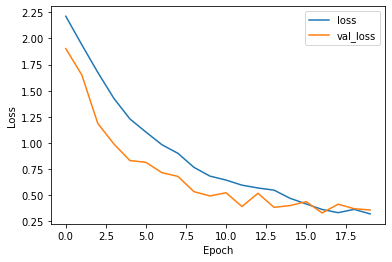

In [28]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

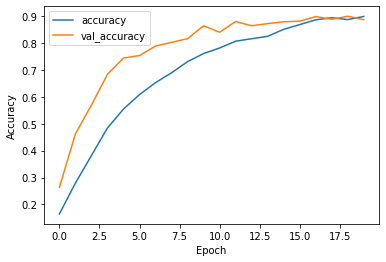

In [29]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [30]:
# Performance evaluation

model.evaluate(X_test, y_test)

28/28 [==============================] - 2s 88ms/step - loss: 0.3629 - accuracy: 0.8927


[0.3628617525100708, 0.8926940560340881]

##### 3.4.2 Model 3

In [16]:
# Convolution and max pooling layers
# kernel_size selected 5,5

# First conv block
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu", # Activation Func = ReLU
                                 input_shape=(64,64,1))) 

model.add(tf.keras.layers.MaxPooling2D((2,2))) # Pooling

# Second conv block
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Third conv block
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Last conv block
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(5,5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

# Flatten layer

model.add(tf.keras.layers.Flatten())

# Classification Layers
# nodes choiced 128, dropout: 0.7, activation function = ReLU

# Dense and Dropout Layer
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.7))

# Dense and Dropout Layer
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.7))

In [17]:
# Output Layer

# We have 10 classification 
# and because of output layer our activation func. is softmax

model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [18]:
# Optimizer

# we use sparse_categorical_crossentropy as there are multiple categories

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [19]:
# Train the model for 15 epochs with batch size of 64

results = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=15,
                    validation_data=(X_val, y_val))

Epoch 1/15
110/110 [==============================] - 123s 1s/step - loss: 2.2135 - accuracy: 0.1653 - val_loss: 1.9839 - val_accuracy: 0.3071
Epoch 2/15
110/110 [==============================] - 118s 1s/step - loss: 1.9706 - accuracy: 0.2734 - val_loss: 1.6342 - val_accuracy: 0.4452
Epoch 3/15
110/110 [==============================] - 121s 1s/step - loss: 1.6666 - accuracy: 0.3923 - val_loss: 1.4143 - val_accuracy: 0.5114
Epoch 4/15
110/110 [==============================] - 103s 933ms/step - loss: 1.4941 - accuracy: 0.4559 - val_loss: 1.1530 - val_accuracy: 0.6404
Epoch 5/15
110/110 [==============================] - 94s 857ms/step - loss: 1.2972 - accuracy: 0.5387 - val_loss: 0.9081 - val_accuracy: 0.7066
Epoch 6/15
110/110 [==============================] - 92s 833ms/step - loss: 1.1074 - accuracy: 0.6023 - val_loss: 0.8733 - val_accuracy: 0.7192
Epoch 7/15
110/110 [==============================] - 92s 835ms/step - loss: 0.9803 - accuracy: 0.6639 - val_loss: 0.6801 - val_accurac

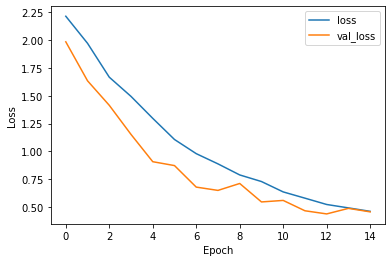

In [20]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

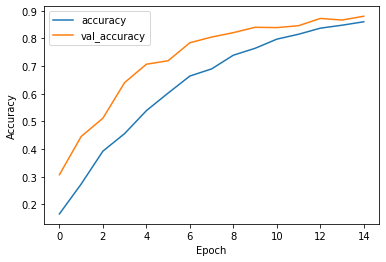

In [21]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [22]:
# Performance evaluation

model.evaluate(X_test, y_test)

28/28 [==============================] - 2s 82ms/step - loss: 0.4072 - accuracy: 0.8813


[0.40723690390586853, 0.8812785148620605]

In [66]:
# Performance evaluation

model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 30ms/step - loss: 0.4355 - accuracy: 0.8801


[0.43551167845726013, 0.8801369667053223]